Random Forest is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression which makes it as ensemble learning technique. This helps in improving accuracy and reducing errors.

1. Training Phase


In [2]:
#Let's start with training the model
pip install opencv-python


SyntaxError: invalid syntax (3034751436.py, line 2)

In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
%matplotlib inline

1.1 Data Set
First, we import the training set and have a look at the data structure

In [5]:
data = pd.read_csv('train.csv.xls')
display(data.head(n=3))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



We can see that the first column indicates the respective number, and the following 784 columns contain a intensity value ranging from 0 to 255. They describe a 28 x 28 image that contains the handwritten number.

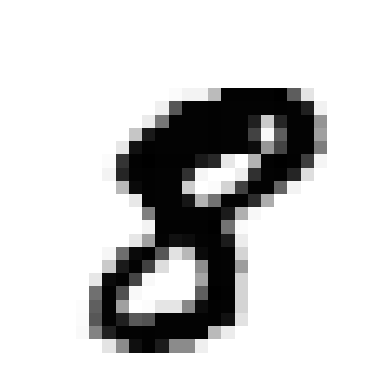

In [6]:
ex_row = data.iloc[[10]].values.ravel()
ex_img = np.array(ex_row[1:].reshape(28, 28), dtype="float32")
plt.imshow(ex_img, cmap = 'Greys')
plt.axis('off')
plt.show()

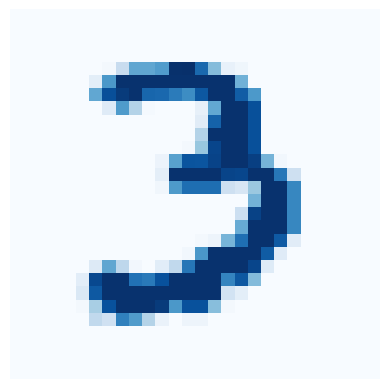

In [7]:
ex_row = data.iloc[[9]].values.ravel()
ex_img = np.array(ex_row[1:].reshape(28, 28), dtype="float32")
plt.imshow(ex_img, cmap = 'Blues')
plt.axis('off')
plt.show()

In [8]:
display(ex_row[0])

np.int64(3)

Restructuring the Data Set and Learning the Classifier
We can now move to the interesting part as we have already understood the data we are analysing. First, we have to set up our data in such a way that the following random forest classifier can be applied.

As so often, we have to construct an array X of the form [n_samples, k_features], and in our case, we have 784 features - each pixel is one feature. For the y values, we have to construct a [n_samples, n_outputs] array, and in our case we only have one output for each image (the number) resulting in a n-dim vector.

In [9]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [10]:
data_matrix = data.to_numpy()
X = data_matrix[:, 1:]
y = data_matrix[:, 0]

In [19]:
data_matrix = data.to_numpy()
X = data_matrix[:, 1:]
y = data_matrix[:, 0]

In [20]:
#Finally, we train our classifier:

rfc = RandomForestClassifier(n_estimators=10).fit(X, y)

Testing

We import the testing data and apply our classfier to the new data:

In [21]:
test_data = pd.read_csv('train.csv.xls').to_numpy()
display(test_data.shape)

(42000, 785)

In [22]:
predicted_numbers = rfc.predict(test_data)
display(predicted_numbers)

ValueError: X has 785 features, but RandomForestClassifier is expecting 784 features as input.

Finally, we can save the results in a csv file.

Finally, we can save the results in a csv file.

In [16]:
results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1), 'Label': predicted_numbers})
results_data.to_csv('results.csv', sep=',', index=False)

NameError: name 'predicted_numbers' is not defined